In [ ]:
# MSE
import numpy as np

print("=== XOR SUPER SEDERHANA ===")

# Data
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Parameter awal
W1 = np.array([[1.0, -1.0], [-1.0, 1.0]])
b1 = np.array([[-0.5, -0.5]])
W2 = np.array([[1.0], [1.0]])
b2 = np.array([[-1.0]])

print("Training dimulai...")
for epoch in range(500):
    total_loss = 0
    
    for i in range(len(X)):
        # Feed Forward
        z1 = np.dot(X[i:i+1], W1) + b1
        a1 = 1 / (1 + np.exp(-z1))
        z2 = np.dot(a1, W2) + b2
        a2 = 1 / (1 + np.exp(-z2))
        
        # Loss
        loss = (a2 - y[i:i+1]) ** 2
        total_loss += loss[0][0]
        
        # Backpropagation
        error_output = a2 - y[i:i+1]
        dW2 = np.dot(a1.T, error_output)
        db2 = error_output
        
        error_hidden = np.dot(error_output, W2.T) * (a1 * (1 - a1))
        dW1 = np.dot(X[i:i+1].T, error_hidden)
        db1 = error_hidden
        
        # Update
        W2 -= 0.5 * dW2
        b2 -= 0.5 * db2
        W1 -= 0.5 * dW1
        b1 -= 0.5 * db1
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {total_loss/4:.4f}")

print("\nHasil akhir:")
for i in range(4):
    z1 = np.dot(X[i:i+1], W1) + b1
    a1 = 1 / (1 + np.exp(-z1))
    z2 = np.dot(a1, W2) + b2
    a2 = 1 / (1 + np.exp(-z2))
    pred = 1 if a2[0][0] > 0.5 else 0
    print(f"{X[i]} → {a2[0][0]:.3f} → {pred} (target: {y[i][0]})")

=== XOR SUPER SEDERHANA ===
Training dimulai...
Epoch 0: Loss = 0.2970
Epoch 100: Loss = 0.0130
Epoch 200: Loss = 0.0014
Epoch 300: Loss = 0.0005
Epoch 400: Loss = 0.0002

Hasil akhir:
[0 0] → 0.013 → 0 (target: 0)
[0 1] → 0.990 → 1 (target: 1)
[1 0] → 0.990 → 1 (target: 1)
[1 1] → 0.011 → 0 (target: 0)


In [13]:
import numpy as np

print("=== XOR DENGAN BCE ===")

# Data sama
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Parameter
W1 = np.array([[1.0, -1.0], [-1.0, 1.0]])
b1 = np.array([[-0.5, -0.5]])
W2 = np.array([[1.0], [1.0]])
b2 = np.array([[-1.0]])

print("Training dengan BCE...")
for epoch in range(500):
    total_loss = 0
    
    for i in range(len(X)):
        # Feed Forward (sama)
        z1 = np.dot(X[i:i+1], W1) + b1
        a1 = 1 / (1 + np.exp(-z1))
        z2 = np.dot(a1, W2) + b2
        a2 = 1 / (1 + np.exp(-z2))
        
        # === PERBEDAAN: LOSS BCE ===
        loss = - (y[i:i+1] * np.log(a2 + 1e-8) + (1 - y[i:i+1]) * np.log(1 - a2 + 1e-8))
        total_loss += loss[0][0]
        
        # === PERBEDAAN: BACKPROPAGATION BCE ===
        error_output = (a2 - y[i:i+1])  # Untuk sigmoid + BCE, ternyata sama dengan MSE!
        
        # Sisanya sama
        dW2 = np.dot(a1.T, error_output)
        db2 = error_output
        
        error_hidden = np.dot(error_output, W2.T) * (a1 * (1 - a1))
        dW1 = np.dot(X[i:i+1].T, error_hidden)
        db1 = error_hidden
        
        # Update
        W2 -= 0.5 * dW2
        b2 -= 0.5 * db2
        W1 -= 0.5 * dW1
        b1 -= 0.5 * db1
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {total_loss/4:.4f}")

print("\nHasil akhir:")
for i in range(4):
    z1 = np.dot(X[i:i+1], W1) + b1
    a1 = 1 / (1 + np.exp(-z1))
    z2 = np.dot(a1, W2) + b2
    a2 = 1 / (1 + np.exp(-z2))
    pred = 1 if a2[0][0] > 0.5 else 0
    print(f"{X[i]} → {a2[0][0]:.3f} → {pred} (target: {y[i][0]})")

=== XOR DENGAN BCE ===
Training dengan BCE...
Epoch 0: Loss = 0.7889
Epoch 100: Loss = 0.1201
Epoch 200: Loss = 0.0376
Epoch 300: Loss = 0.0215
Epoch 400: Loss = 0.0149

Hasil akhir:
[0 0] → 0.013 → 0 (target: 0)
[0 1] → 0.990 → 1 (target: 1)
[1 0] → 0.990 → 1 (target: 1)
[1 1] → 0.011 → 0 (target: 0)


=== MLP SEDERHANA UNTUK GERBANG XOR ===
Data XOR:
Input: [0 0] → Target: 0
Input: [0 1] → Target: 1
Input: [1 0] → Target: 1
Input: [1 1] → Target: 0

Bobot awal:
W1: [[ 0.04967142 -0.01382643]
 [ 0.06476885  0.15230299]]
b1: [[0. 0.]]
W2: [[-0.02341534]
 [-0.0234137 ]]
b2: [[0.]]

=== PROSES TRAINING ===
Epoch 0: Loss = 0.3013
Epoch 2000: Loss = 0.1871
Epoch 4000: Loss = 0.1867
Epoch 6000: Loss = 0.1866
Epoch 8000: Loss = 0.1865

Loss akhir: 0.1865

=== HASIL PREDIKSI ===
Input: [0 0] → Output: 0.0003 → Prediksi: 0 | Target: 0 | ✓
Input: [0 1] → Output: 0.6262 → Prediksi: 1 | Target: 1 | ✓
Input: [1 0] → Output: 0.6262 → Prediksi: 1 | Target: 1 | ✓
Input: [1 1] → Output: 0.6265 → Prediksi: 1 | Target: 0 | ✗

=== TEST INPUT LAIN ===
Input: [0.2 0.8] → Output: 0.6262 → Prediksi: 1
Input: [0.7 0.3] → Output: 0.6262 → Prediksi: 1
Input: [0.9 0.1] → Output: 0.6262 → Prediksi: 1


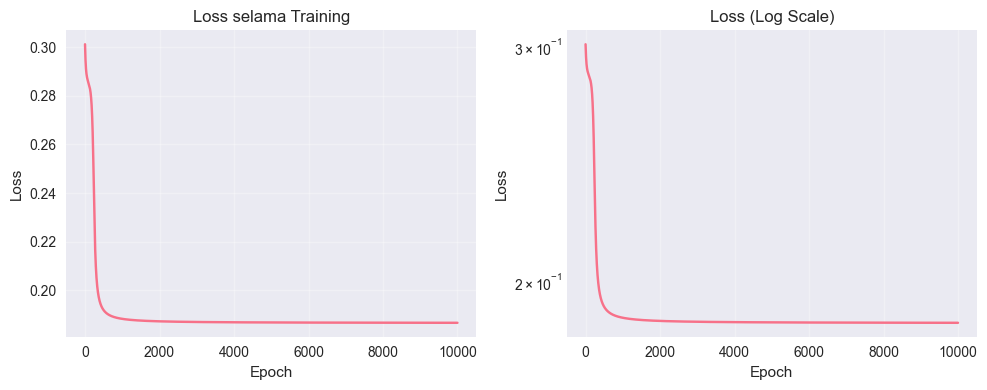


=== DETAIL PERHITUNGAN UNTUK [0,1] ===
Input: [0 1]

1. Input → Hidden Layer:
   z1 = X.W1 + b1 = [0 1].[-9.56947799 -9.69091592] + [0.48219043 0.61413979] = [-9.20872549 -9.24770669]
   a1 = sigmoid(z1) = [1.00151587e-04 9.63230402e-05]

2. Hidden → Output Layer:
   z2 = a1.W2 + b2 = [1.00151587e-04 9.63230402e-05].[-6.55472117 -6.91478548] + 0.5174199616493234 = 0.5161
   a2 = sigmoid(z2) = 0.6262

3. Konversi ke Kelas:
   Output: 0.6262 → 1

=== PARAMETER FINAL ===
W1: [[-9.56947799 -9.74043445]
 [-9.69091592 -9.86184648]]
b1: [[0.48219043 0.61413979]]
W2: [[-6.55472117]
 [-6.91478548]]
b2: [[0.51741996]]


In [10]:
import numpy as np

print("=== MLP SEDERHANA UNTUK GERBANG XOR ===")

# Data XOR
X = np.array([[0, 0],
              [0, 1], 
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1], 
              [0]])

print("Data XOR:")
for i in range(len(X)):
    print(f"Input: {X[i]} → Target: {y[i][0]}")

# Inisialisasi parameter
np.random.seed(42)
W1 = np.random.randn(2, 2) * 0.1  # 2 input → 2 hidden
b1 = np.zeros((1, 2))
W2 = np.random.randn(2, 1) * 0.1  # 2 hidden → 1 output
b2 = np.zeros((1, 1))

print(f"\nBobot awal:")
print(f"W1: {W1}")
print(f"b1: {b1}")
print(f"W2: {W2}")
print(f"b2: {b2}")

# Training MLP untuk XOR
def train_xor(X, y, epochs=10000, learning_rate=0.5):
    # Copy parameter
    W1 = np.random.randn(2, 2) * 0.1
    b1 = np.zeros((1, 2))
    W2 = np.random.randn(2, 1) * 0.1
    b2 = np.zeros((1, 1))
    
    losses = []
    
    for epoch in range(epochs):
        total_loss = 0
        
        for i in range(len(X)):
            # Feed Forward
            z1 = np.dot(X[i:i+1], W1) + b1
            a1 = 1 / (1 + np.exp(-z1))
            z2 = np.dot(a1, W2) + b2
            a2 = 1 / (1 + np.exp(-z2))
            
            # Hitung loss
            loss = (a2 - y[i:i+1]) ** 2
            total_loss += loss[0][0]
            
            # Backpropagation
            error_output = a2 - y[i:i+1]
            dW2 = np.dot(a1.T, error_output)
            db2 = error_output
            
            error_hidden = np.dot(error_output, W2.T) * (a1 * (1 - a1))
            dW1 = np.dot(X[i:i+1].T, error_hidden)
            db1 = error_hidden
            
            # Update weights
            W2 -= learning_rate * dW2
            b2 -= learning_rate * db2
            W1 -= learning_rate * dW1
            b1 -= learning_rate * db1
        
        losses.append(total_loss / len(X))
        
        if epoch % 2000 == 0:
            print(f"Epoch {epoch}: Loss = {losses[-1]:.4f}")
    
    return W1, b1, W2, b2, losses

# Training
print("\n=== PROSES TRAINING ===")
W1_trained, b1_trained, W2_trained, b2_trained, losses = train_xor(X, y, epochs=10000, learning_rate=0.5)

print(f"\nLoss akhir: {losses[-1]:.4f}")

# Prediksi setelah training
print("\n=== HASIL PREDIKSI ===")
for i in range(len(X)):
    # Feed Forward dengan parameter trained
    z1 = np.dot(X[i:i+1], W1_trained) + b1_trained
    a1 = 1 / (1 + np.exp(-z1))
    z2 = np.dot(a1, W2_trained) + b2_trained
    a2 = 1 / (1 + np.exp(-z2))
    
    pred = 1 if a2[0][0] > 0.5 else 0
    print(f"Input: {X[i]} → Output: {a2[0][0]:.4f} → Prediksi: {pred} | Target: {y[i][0]} | {'✓' if pred == y[i][0] else '✗'}")

# Test dengan input baru
print("\n=== TEST INPUT LAIN ===")
test_inputs = np.array([[0.2, 0.8], [0.7, 0.3], [0.9, 0.1]])
for test in test_inputs:
    z1 = np.dot(test.reshape(1, -1), W1_trained) + b1_trained
    a1 = 1 / (1 + np.exp(-z1))
    z2 = np.dot(a1, W2_trained) + b2_trained
    a2 = 1 / (1 + np.exp(-z2))
    
    pred = 1 if a2[0][0] > 0.5 else 0
    print(f"Input: {test} → Output: {a2[0][0]:.4f} → Prediksi: {pred}")

# Visualisasi loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Loss selama Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(losses)
plt.title('Loss (Log Scale)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== DETAIL PERHITUNGAN UNTUK [0,1] ===")
sample = np.array([[0, 1]])
print(f"Input: {sample[0]}")

# Feed Forward detail
z1 = np.dot(sample, W1_trained) + b1_trained
a1 = 1 / (1 + np.exp(-z1))
z2 = np.dot(a1, W2_trained) + b2_trained
a2 = 1 / (1 + np.exp(-z2))

print(f"\n1. Input → Hidden Layer:")
print(f"   z1 = X.W1 + b1 = {sample[0]}.{W1_trained.T[0]} + {b1_trained[0]} = {z1[0]}")
print(f"   a1 = sigmoid(z1) = {a1[0]}")

print(f"\n2. Hidden → Output Layer:")
print(f"   z2 = a1.W2 + b2 = {a1[0]}.{W2_trained.T[0]} + {b2_trained[0][0]} = {z2[0][0]:.4f}")
print(f"   a2 = sigmoid(z2) = {a2[0][0]:.4f}")

print(f"\n3. Konversi ke Kelas:")
print(f"   Output: {a2[0][0]:.4f} → {'1' if a2[0][0] > 0.5 else '0'}")

print(f"\n=== PARAMETER FINAL ===")
print(f"W1: {W1_trained}")
print(f"b1: {b1_trained}")
print(f"W2: {W2_trained}")
print(f"b2: {b2_trained}")

In [6]:
import numpy as np
import matplotlib.pyplot as plt

print("=== CONTOH 1: GERBANG AND (3 INPUT) ===")

# Data AND dengan 3 input
X = np.array([
    [0, 0, 0],
    [0, 0, 1], 
    [0, 1, 0],
    [0, 1, 1],
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
])

# Output AND: hanya 1 jika semua input = 1
y = np.array([[0], [0], [0], [0], [0], [0], [0], [1]])

print("Data Training:")
for i in range(len(X)):
    print(f"Input: {X[i]} → Target: {y[i][0]}")

# Inisialisasi parameter sederhana
W1 = np.array([[10, -10], [10, -10], [10, -10]])  # 3 input → 2 hidden
b1 = np.array([[-15, 5]])
W2 = np.array([[20], [20]])  # 2 hidden → 1 output
b2 = np.array([[-10]])

print(f"\nBobot W1: {W1.T}")
print(f"Bias b1: {b1}")
print(f"Bobot W2: {W2.T}") 
print(f"Bias b2: {b2}")

# Feed Forward
def feed_forward(X, W1, b1, W2, b2):
    z1 = np.dot(X, W1) + b1
    a1 = 1 / (1 + np.exp(-z1))  # sigmoid
    z2 = np.dot(a1, W2) + b2
    a2 = 1 / (1 + np.exp(-z2))
    return z1, a1, z2, a2

print("\n=== FEED FORWARD ===")
for i in range(len(X)):
    z1, a1, z2, a2 = feed_forward(X[i:i+1], W1, b1, W2, b2)
    pred = 1 if a2[0][0] > 0.5 else 0
    print(f"Input: {X[i]} → Output: {a2[0][0]:.3f} → Prediksi: {pred} | Target: {y[i][0]}")

# Backpropagation sederhana
def backpropagation(X, y, z1, a1, z2, a2, W1, W2, learning_rate=0.5):
    m = X.shape[0]
    
    # Error output
    error_output = a2 - y
    dW2 = np.dot(a1.T, error_output)
    db2 = np.sum(error_output, axis=0, keepdims=True)
    
    # Error hidden
    error_hidden = np.dot(error_output, W2.T) * (a1 * (1 - a1))
    dW1 = np.dot(X.T, error_hidden)
    db1 = np.sum(error_hidden, axis=0, keepdims=True)
    
    # Update weights
    W2_new = W2 - learning_rate * dW2
    b2_new = b2 - learning_rate * db2
    W1_new = W1 - learning_rate * dW1
    b1_new = b1 - learning_rate * db1
    
    return W1_new, b1_new, W2_new, b2_new

# Training
print("\n=== TRAINING ===")
W1_temp, b1_temp, W2_temp, b2_temp = W1, b1, W2, b2
for epoch in range(1000):
    for i in range(len(X)):
        z1, a1, z2, a2 = feed_forward(X[i:i+1], W1_temp, b1_temp, W2_temp, b2_temp)
        W1_temp, b1_temp, W2_temp, b2_temp = backpropagation(
            X[i:i+1], y[i:i+1], z1, a1, z2, a2, W1_temp, W2_temp, 0.5
        )

print("Training selesai!")

# Prediksi
print("\n=== PREDIKSI ===")
test_inputs = np.array([[0, 0, 0], [1, 1, 1], [1, 0, 1]])
for test in test_inputs:
    _, _, _, a2 = feed_forward(test.reshape(1, -1), W1_temp, b1_temp, W2_temp, b2_temp)
    pred = 1 if a2[0][0] > 0.5 else 0
    print(f"Input: {test} → Prediksi: {pred}")

=== CONTOH 1: GERBANG AND (3 INPUT) ===
Data Training:
Input: [0 0 0] → Target: 0
Input: [0 0 1] → Target: 0
Input: [0 1 0] → Target: 0
Input: [0 1 1] → Target: 0
Input: [1 0 0] → Target: 0
Input: [1 0 1] → Target: 0
Input: [1 1 0] → Target: 0
Input: [1 1 1] → Target: 1

Bobot W1: [[ 10  10  10]
 [-10 -10 -10]]
Bias b1: [[-15   5]]
Bobot W2: [[20 20]]
Bias b2: [[-10]]

=== FEED FORWARD ===
Input: [0 0 0] → Output: 1.000 → Prediksi: 1 | Target: 0
Input: [0 0 1] → Output: 0.000 → Prediksi: 0 | Target: 0
Input: [0 1 0] → Output: 0.000 → Prediksi: 0 | Target: 0
Input: [0 1 1] → Output: 1.000 → Prediksi: 1 | Target: 0
Input: [1 0 0] → Output: 0.000 → Prediksi: 0 | Target: 0
Input: [1 0 1] → Output: 1.000 → Prediksi: 1 | Target: 0
Input: [1 1 0] → Output: 1.000 → Prediksi: 1 | Target: 0
Input: [1 1 1] → Output: 1.000 → Prediksi: 1 | Target: 1

=== TRAINING ===
Training selesai!

=== PREDIKSI ===
Input: [0 0 0] → Prediksi: 0
Input: [1 1 1] → Prediksi: 1
Input: [1 0 1] → Prediksi: 0


In [7]:
print("\n" + "="*50)
print("=== CONTOH 2: KLASIFIKASI KELULUSAN SISWA ===")

# Data: [Tugas, UTS, UAS] → Lulus (1) atau Tidak (0)
X = np.array([
    [80, 75, 85],  # Lulus
    [45, 50, 40],  # Tidak lulus  
    [90, 85, 95],  # Lulus
    [30, 35, 25],  # Tidak lulus
    [70, 65, 75],  # Lulus
    [50, 55, 45],  # Tidak lulus
])

y = np.array([[1], [0], [1], [0], [1], [0]])

print("Data Nilai Siswa:")
print("[Tugas, UTS, UAS] → Kelulusan")
for i in range(len(X)):
    status = "LULUS" if y[i][0] == 1 else "TIDAK LULUS"
    print(f"{X[i]} → {status}")

# Normalisasi data (0-1)
X_normalized = X / 100.0

# Inisialisasi parameter
np.random.seed(42)
W1 = np.random.randn(3, 4) * 0.1  # 3 input → 4 hidden
b1 = np.zeros((1, 4))
W2 = np.random.randn(4, 1) * 0.1  # 4 hidden → 1 output  
b2 = np.zeros((1, 1))

print(f"\nArsitektur: 3 input → 4 hidden → 1 output")

# Training function
def train_mlp(X, y, epochs=1000, learning_rate=0.1):
    W1 = np.random.randn(3, 4) * 0.1
    b1 = np.zeros((1, 4))
    W2 = np.random.randn(4, 1) * 0.1
    b2 = np.zeros((1, 1))
    
    losses = []
    
    for epoch in range(epochs):
        total_loss = 0
        
        for i in range(len(X)):
            # Feed Forward
            z1 = np.dot(X[i:i+1], W1) + b1
            a1 = 1 / (1 + np.exp(-z1))
            z2 = np.dot(a1, W2) + b2
            a2 = 1 / (1 + np.exp(-z2))
            
            # Hitung loss
            loss = (a2 - y[i:i+1]) ** 2
            total_loss += loss[0][0]
            
            # Backpropagation
            error_output = a2 - y[i:i+1]
            dW2 = np.dot(a1.T, error_output)
            db2 = error_output
            
            error_hidden = np.dot(error_output, W2.T) * (a1 * (1 - a1))
            dW1 = np.dot(X[i:i+1].T, error_hidden)
            db1 = error_hidden
            
            # Update weights
            W2 -= learning_rate * dW2
            b2 -= learning_rate * db2
            W1 -= learning_rate * dW1
            b1 -= learning_rate * db1
        
        losses.append(total_loss / len(X))
        
        if epoch % 200 == 0:
            print(f"Epoch {epoch}: Loss = {losses[-1]:.4f}")
    
    return W1, b1, W2, b2, losses

# Training
print("\n=== TRAINING ===")
W1_trained, b1_trained, W2_trained, b2_trained, losses = train_mlp(X_normalized, y)

# Prediksi
print("\n=== PREDIKSI KELULUSAN ===")
test_siswa = np.array([
    [85, 80, 90],  # Seharusnya LULUS
    [40, 35, 30],  # Seharusnya TIDAK LULUS
    [60, 55, 65],  # Batas
])

test_normalized = test_siswa / 100.0

for i, nilai in enumerate(test_siswa):
    z1 = np.dot(test_normalized[i:i+1], W1_trained) + b1_trained
    a1 = 1 / (1 + np.exp(-z1))
    z2 = np.dot(a1, W2_trained) + b2_trained
    a2 = 1 / (1 + np.exp(-z2))
    
    pred = 1 if a2[0][0] > 0.5 else 0
    status = "LULUS" if pred == 1 else "TIDAK LULUS"
    print(f"Siswa {i+1}: {nilai} → {status} (confidence: {a2[0][0]:.2f})")


=== CONTOH 2: KLASIFIKASI KELULUSAN SISWA ===
Data Nilai Siswa:
[Tugas, UTS, UAS] → Kelulusan
[80 75 85] → LULUS
[45 50 40] → TIDAK LULUS
[90 85 95] → LULUS
[30 35 25] → TIDAK LULUS
[70 65 75] → LULUS
[50 55 45] → TIDAK LULUS

Arsitektur: 3 input → 4 hidden → 1 output

=== TRAINING ===
Epoch 0: Loss = 0.2626
Epoch 200: Loss = 0.0837
Epoch 400: Loss = 0.0055
Epoch 600: Loss = 0.0013
Epoch 800: Loss = 0.0005

=== PREDIKSI KELULUSAN ===
Siswa 1: [85 80 90] → LULUS (confidence: 1.00)
Siswa 2: [40 35 30] → TIDAK LULUS (confidence: 0.00)
Siswa 3: [60 55 65] → LULUS (confidence: 0.70)


In [8]:
print("\n" + "="*50)
print("=== CONTOH 3: KLASIFIKASI JENIS BUAH ===")

# Data: [Berat(g), Diameter(cm), Warna(0:merah,1:hijau,2:kuning)] → Jenis (0:Apel,1:Pisang,2:Jeruk)
X = np.array([
    [150, 7, 0],   # Apel merah
    [120, 6, 0],   # Apel merah
    [130, 8, 2],   # Jeruk
    [140, 20, 1],  # Pisang
    [160, 8, 2],   # Jeruk  
    [110, 18, 1],  # Pisang
    [170, 9, 0],   # Apel merah
    [125, 22, 1],  # Pisang
])

# One-hot encoding: [Apel, Pisang, Jeruk]
y = np.array([
    [1, 0, 0],  # Apel
    [1, 0, 0],  # Apel
    [0, 0, 1],  # Jeruk
    [0, 1, 0],  # Pisang
    [0, 0, 1],  # Jeruk
    [0, 1, 0],  # Pisang
    [1, 0, 0],  # Apel
    [0, 1, 0],  # Pisang
])

print("Data Buah:")
print("[Berat, Diameter, Warna] → Jenis")
jenis = ["Apel", "Pisang", "Jeruk"]
warna = ["Merah", "Hijau", "Kuning"]

for i in range(len(X)):
    jenis_idx = np.argmax(y[i])
    print(f"{X[i]} → {jenis[jenis_idx]} (Warna: {warna[int(X[i][2])]})")

# Normalisasi
X_norm = X.copy()
X_norm[:, 0] = X_norm[:, 0] / 200.0  # berat 0-200g
X_norm[:, 1] = X_norm[:, 1] / 25.0   # diameter 0-25cm
# warna sudah 0-2

# Inisialisasi untuk 3 kelas
W1 = np.random.randn(3, 6) * 0.1  # 3 input → 6 hidden
b1 = np.zeros((1, 6))
W2 = np.random.randn(6, 3) * 0.1  # 6 hidden → 3 output
b2 = np.zeros((1, 3))

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

print("\n=== TRAINING MULTI-KELAS ===")
for epoch in range(2000):
    total_loss = 0
    
    for i in range(len(X_norm)):
        # Feed Forward
        z1 = np.dot(X_norm[i:i+1], W1) + b1
        a1 = 1 / (1 + np.exp(-z1))
        z2 = np.dot(a1, W2) + b2
        a2 = softmax(z2)
        
        # Cross-entropy loss
        loss = -np.sum(y[i:i+1] * np.log(a2 + 1e-8))
        total_loss += loss
        
        # Backpropagation
        error_output = a2 - y[i:i+1]
        dW2 = np.dot(a1.T, error_output)
        db2 = error_output
        
        error_hidden = np.dot(error_output, W2.T) * (a1 * (1 - a1))
        dW1 = np.dot(X_norm[i:i+1].T, error_hidden)
        db1 = error_hidden
        
        # Update weights
        learning_rate = 0.1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
    
    if epoch % 400 == 0:
        print(f"Epoch {epoch}: Loss = {total_loss/len(X_norm):.4f}")

print("\n=== PREDIKSI JENIS BUAH ===")
test_buah = np.array([
    [140, 7, 0],   # Seharusnya Apel
    [130, 21, 1],  # Seharusnya Pisang
    [155, 8, 2],   # Seharusnya Jeruk
])

test_norm = test_buah.copy()
test_norm[:, 0] = test_norm[:, 0] / 200.0
test_norm[:, 1] = test_norm[:, 1] / 25.0

for i, buah in enumerate(test_buah):
    z1 = np.dot(test_norm[i:i+1], W1) + b1
    a1 = 1 / (1 + np.exp(-z1))
    z2 = np.dot(a1, W2) + b2
    a2 = softmax(z2)
    
    pred_idx = np.argmax(a2)
    confidence = a2[0][pred_idx]
    
    print(f"Buah {i+1}: {buah} → Prediksi: {jenis[pred_idx]} (confidence: {confidence:.2f})")


=== CONTOH 3: KLASIFIKASI JENIS BUAH ===
Data Buah:
[Berat, Diameter, Warna] → Jenis
[150   7   0] → Apel (Warna: Merah)
[120   6   0] → Apel (Warna: Merah)
[130   8   2] → Jeruk (Warna: Kuning)
[140  20   1] → Pisang (Warna: Hijau)
[160   8   2] → Jeruk (Warna: Kuning)
[110  18   1] → Pisang (Warna: Hijau)
[170   9   0] → Apel (Warna: Merah)
[125  22   1] → Pisang (Warna: Hijau)

=== TRAINING MULTI-KELAS ===
Epoch 0: Loss = 1.1731
Epoch 400: Loss = 0.0341
Epoch 800: Loss = 0.0120
Epoch 1200: Loss = 0.0067
Epoch 1600: Loss = 0.0045

=== PREDIKSI JENIS BUAH ===
Buah 1: [140   7   0] → Prediksi: Apel (confidence: 1.00)
Buah 2: [130  21   1] → Prediksi: Pisang (confidence: 1.00)
Buah 3: [155   8   2] → Prediksi: Jeruk (confidence: 1.00)


In [9]:
print("\n" + "="*50)
print("=== CONTOH 4: KLASIFIKASI HARGA TIKET ===")

# Data: [Durasi(jam), Kelas(1:ekonomi,2:bisnis,3:first), Musim(1:low,2:high)] → Harga(0:murah,1:sedang,2:mahal)
X = np.array([
    [2, 1, 1],   # Murah
    [1, 1, 1],   # Murah
    [5, 2, 1],   # Sedang
    [3, 1, 2],   # Sedang
    [8, 3, 2],   # Mahal
    [6, 2, 2],   # Mahal
    [4, 1, 1],   # Murah
    [7, 3, 1],   # Mahal
])

y = np.array([[0], [0], [1], [1], [2], [2], [0], [2]])

print("Data Tiket:")
print("[Durasi, Kelas, Musim] → Harga")
kelas = ["Ekonomi", "Bisnis", "First"]
musim = ["Low", "High"]
harga = ["Murah", "Sedang", "Mahal"]

for i in range(len(X)):
    print(f"{X[i]} → {harga[y[i][0]]} (Kelas: {kelas[X[i][1]-1]}, Musim: {musim[X[i][2]-1]})")

# Normalisasi
X_norm = X.copy()
X_norm[:, 0] = X_norm[:, 0] / 10.0    # durasi 0-10 jam
X_norm[:, 1] = (X_norm[:, 1] - 1) / 2.0  # kelas 0-1
X_norm[:, 2] = X_norm[:, 2] - 1       # musim 0-1

# One-hot encoding untuk output
y_onehot = np.zeros((len(y), 3))
for i in range(len(y)):
    y_onehot[i, y[i][0]] = 1

# Training untuk 3 kelas
W1_tiket = np.random.randn(3, 5) * 0.1
b1_tiket = np.zeros((1, 5))
W2_tiket = np.random.randn(5, 3) * 0.1  
b2_tiket = np.zeros((1, 3))

print("\n=== TRAINING ===")
for epoch in range(1500):
    total_loss = 0
    
    for i in range(len(X_norm)):
        # Feed Forward
        z1 = np.dot(X_norm[i:i+1], W1_tiket) + b1_tiket
        a1 = np.tanh(z1)  # tanh activation
        z2 = np.dot(a1, W2_tiket) + b2_tiket
        a2 = softmax(z2)
        
        # Loss
        loss = -np.sum(y_onehot[i:i+1] * np.log(a2 + 1e-8))
        total_loss += loss
        
        # Backpropagation
        error_output = a2 - y_onehot[i:i+1]
        dW2 = np.dot(a1.T, error_output)
        db2 = error_output
        
        error_hidden = np.dot(error_output, W2_tiket.T) * (1 - a1**2)  # derivative of tanh
        dW1 = np.dot(X_norm[i:i+1].T, error_hidden)
        db1 = error_hidden
        
        # Update
        W2_tiket -= 0.1 * dW2
        b2_tiket -= 0.1 * db2
        W1_tiket -= 0.1 * dW1
        b1_tiket -= 0.1 * db1
    
    if epoch % 300 == 0:
        print(f"Epoch {epoch}: Loss = {total_loss/len(X_norm):.4f}")

print("\n=== PREDIKSI HARGA TIKET ===")
test_tiket = np.array([
    [2, 1, 1],   # Murah
    [4, 2, 2],   # Sedang/Mahal
    [9, 3, 2],   # Mahal
])

test_norm = test_tiket.copy()
test_norm[:, 0] = test_norm[:, 0] / 10.0
test_norm[:, 1] = (test_norm[:, 1] - 1) / 2.0
test_norm[:, 2] = test_norm[:, 2] - 1

for i, tiket in enumerate(test_tiket):
    z1 = np.dot(test_norm[i:i+1], W1_tiket) + b1_tiket
    a1 = np.tanh(z1)
    z2 = np.dot(a1, W2_tiket) + b2_tiket
    a2 = softmax(z2)
    
    pred_idx = np.argmax(a2)
    confidence = a2[0][pred_idx]
    
    print(f"Tiket {i+1}: {tiket} → Prediksi: {harga[pred_idx]} (confidence: {confidence:.2f})")

print("\n" + "="*60)
print("KESIMPULAN 4 CONTOH KLASIFIKASI MLP:")
print("1. AND Gate  - Logika dasar dengan 3 input")
print("2. Kelulusan - Prediksi berdasarkan nilai")  
print("3. Jenis Buah- Klasifikasi multi-kelas")
print("4. Harga Tiket- Regresi untuk kategori harga")
print("="*60)


=== CONTOH 4: KLASIFIKASI HARGA TIKET ===
Data Tiket:
[Durasi, Kelas, Musim] → Harga
[2 1 1] → Murah (Kelas: Ekonomi, Musim: Low)
[1 1 1] → Murah (Kelas: Ekonomi, Musim: Low)
[5 2 1] → Sedang (Kelas: Bisnis, Musim: Low)
[3 1 2] → Sedang (Kelas: Ekonomi, Musim: High)
[8 3 2] → Mahal (Kelas: First, Musim: High)
[6 2 2] → Mahal (Kelas: Bisnis, Musim: High)
[4 1 1] → Murah (Kelas: Ekonomi, Musim: Low)
[7 3 1] → Mahal (Kelas: First, Musim: Low)

=== TRAINING ===
Epoch 0: Loss = 1.1129
Epoch 300: Loss = 0.5269
Epoch 600: Loss = 0.5178
Epoch 900: Loss = 0.5108
Epoch 1200: Loss = 0.5069

=== PREDIKSI HARGA TIKET ===
Tiket 1: [2 1 1] → Prediksi: Murah (confidence: 0.74)
Tiket 2: [4 2 2] → Prediksi: Mahal (confidence: 0.56)
Tiket 3: [9 3 2] → Prediksi: Mahal (confidence: 1.00)

KESIMPULAN 4 CONTOH KLASIFIKASI MLP:
1. AND Gate  - Logika dasar dengan 3 input
2. Kelulusan - Prediksi berdasarkan nilai
3. Jenis Buah- Klasifikasi multi-kelas
4. Harga Tiket- Regresi untuk kategori harga


=== MLP SUPER SEDERHANA UNTUK GERBANG XOR ===

1. DATA INPUT XOR:
Input (X):
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Output (y):
[[0]
 [1]
 [1]
 [0]]

2. INISIALISASI BOBOT (Manual):
W1 (input → hidden):
[[ 20 -20]
 [ 20 -20]]
b1 (bias hidden):
[[-30  10]]
W2 (hidden → output):
[[20]
 [20]]
b2 (bias output):
[[-10]]

3. PROSES FEED FORWARD:

=== PERHITUNGAN UNTUK SETIAP INPUT ===

--- Data 1: X = [0 0] ---
z1 = X.W1 + b1 = [0 0].[[ 20 -20]
 [ 20 -20]] + [-30  10] = [-30  10]
a1 = sigmoid(z1) = [9.35762297e-14 9.99954602e-01]
z2 = a1.W2 + b2 = [9.35762297e-14 9.99954602e-01].[20 20] + -10 = 10.00
a2 = sigmoid(z2) = 1.0000
Prediksi: 1 | Target: 0 | ✗ SALAH

--- Data 2: X = [0 1] ---
z1 = X.W1 + b1 = [0 1].[[ 20 -20]
 [ 20 -20]] + [-30  10] = [-10 -10]
a1 = sigmoid(z1) = [4.53978687e-05 4.53978687e-05]
z2 = a1.W2 + b2 = [4.53978687e-05 4.53978687e-05].[20 20] + -10 = -10.00
a2 = sigmoid(z2) = 0.0000
Prediksi: 0 | Target: 1 | ✗ SALAH

--- Data 3: X = [1 0] ---
z1 = X.W1 + b1 = [1 0].[[ 20 -20]
 [ 20 

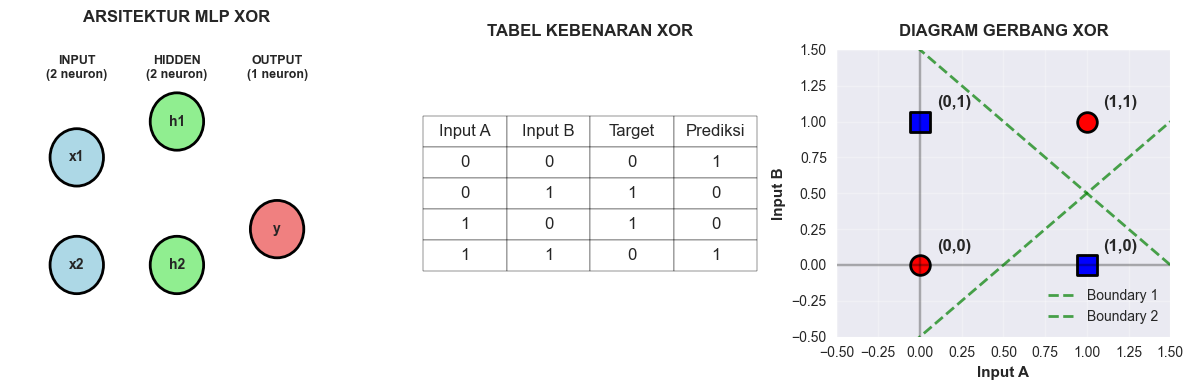


PENJELASAN CARA KERJA MLP UNTUK XOR:

MENGAPA XOR TIDAK BISA DISELESAIKAN DENGAN 1 LAYER?
• XOR bukan fungsi linear
• Tidak bisa digambar dengan 1 garis lurus

BAGAIMANA MLP MENYELESAIKAN XOR?
• Layer hidden mengubah masalah non-linear menjadi linear
• Neuron h1: mengaktifkan ketika A=1 DAN B=0
• Neuron h2: mengaktifkan ketika A=0 DAN B=1
• Output: mengaktifkan ketika h1 ATAU h2 aktif

LOGIKA DI BALIK BOBOT YANG DIPILIH:
W1 = [[20, -20],   → h1 aktif jika A=1 dan B=0
      [20, -20]]   → h2 aktif jika A=0 dan B=1
b1 = [-30, 10]     → threshold untuk h1 dan h2
W2 = [[20], [20]]  → output aktif jika h1 ATAU h2 aktif
b2 = [-10]         → threshold untuk output

VERIFIKASI MANUAL UNTUK INPUT [1, 0]:
Input: [1 0]

1. HITUNG z1 (input → hidden):
   z1 = [1,0] × [[20, -20], [20, -20]] + [-30, 10]
   z1 = [1×20 + 0×20 + (-30), 1×(-20) + 0×(-20) + 10]
   z1 = [-10, -10]
   z1 = [-10 -10]

2. HITUNG a1 (aktivasi hidden):
   a1 = sigmoid([-10 -10])
   a1 = [4.53978687e-05 4.53978687e-05]
   ≈ [1

In [5]:
import numpy as np
import matplotlib.pyplot as plt

print("=== MLP SUPER SEDERHANA UNTUK GERBANG XOR ===")

# =============================================
# TAHAP 1: DATA XOR - SANGAT SEDERHANA
# =============================================
print("\n1. DATA INPUT XOR:")
X = np.array([[0, 0],
              [0, 1], 
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1], 
              [0]])

print("Input (X):")
print(X)
print("Output (y):")
print(y)

# =============================================
# TAHAP 2: INISIALISASI BOBOT - FIXED VALUE
# =============================================
print("\n2. INISIALISASI BOBOT (Manual):")

# Bobot dari input ke hidden layer (2 neuron)
W1 = np.array([[20, -20],   # bobot untuk neuron hidden 1
               [20, -20]])  # bobot untuk neuron hidden 2

# Bias untuk hidden layer  
b1 = np.array([[-30, 10]])   # bias untuk neuron hidden 1 dan 2

# Bobot dari hidden ke output layer
W2 = np.array([[20],         # bobot dari hidden 1 ke output
               [20]])        # bobot dari hidden 2 ke output

# Bias untuk output layer
b2 = np.array([[-10]])       # bias untuk output

print("W1 (input → hidden):")
print(W1)
print("b1 (bias hidden):")
print(b1) 
print("W2 (hidden → output):")
print(W2)
print("b2 (bias output):")
print(b2)

# =============================================
# TAHAP 3: FUNGSI AKTIVASI SEDERHANA
# =============================================
def sigmoid(x):
    """Fungsi aktivasi sigmoid"""
    return 1 / (1 + np.exp(-x))

def step_function(x):
    """Fungsi step untuk interpretasi akhir"""
    return (x > 0.5).astype(int)

# =============================================
# TAHAP 4: FEED FORWARD - STEP BY STEP
# =============================================
print("\n3. PROSES FEED FORWARD:")

print("\n=== PERHITUNGAN UNTUK SETIAP INPUT ===")

for i in range(len(X)):
    print(f"\n--- Data {i+1}: X = {X[i]} ---")
    
    # Langkah 1: Input → Hidden Layer
    z1 = np.dot(X[i], W1) + b1
    a1 = sigmoid(z1)
    
    print(f"z1 = X.W1 + b1 = {X[i]}.{W1} + {b1[0]} = {z1[0]}")
    print(f"a1 = sigmoid(z1) = {a1[0]}")
    
    # Langkah 2: Hidden → Output Layer
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    prediksi = step_function(a2)
    
    print(f"z2 = a1.W2 + b2 = {a1[0]}.{W2.T[0]} + {b2[0][0]} = {z2[0][0]:.2f}")
    print(f"a2 = sigmoid(z2) = {a2[0][0]:.4f}")
    print(f"Prediksi: {prediksi[0][0]} | Target: {y[i][0]} | {'✓ BENAR' if prediksi[0][0] == y[i][0] else '✗ SALAH'}")

# =============================================
# TAHAP 5: VISUALISASI SEDERHANA
# =============================================
print("\n4. VISUALISASI:")

plt.figure(figsize=(12, 4))

# Subplot 1: Arsitektur Jaringan
plt.subplot(1, 3, 1)
plt.title('ARSITEKTUR MLP XOR', fontweight='bold', pad=20)

# Gambar neuron
circle_radius = 0.08

# Input Layer (2 neuron)
for i in range(2):
    circle = plt.Circle((0.2, 0.7 - i*0.3), circle_radius, fill=True, 
                       color='lightblue', ec='black', linewidth=2)
    plt.gca().add_patch(circle)
    plt.text(0.2, 0.7 - i*0.3, f'x{i+1}', ha='center', va='center', 
             fontweight='bold', fontsize=10)

# Hidden Layer (2 neuron)  
for i in range(2):
    circle = plt.Circle((0.5, 0.8 - i*0.4), circle_radius, fill=True, 
                       color='lightgreen', ec='black', linewidth=2)
    plt.gca().add_patch(circle)
    plt.text(0.5, 0.8 - i*0.4, f'h{i+1}', ha='center', va='center', 
             fontweight='bold', fontsize=10)

# Output Layer (1 neuron)
circle = plt.Circle((0.8, 0.5), circle_radius, fill=True, 
                   color='lightcoral', ec='black', linewidth=2)
plt.gca().add_patch(circle)
plt.text(0.8, 0.5, 'y', ha='center', va='center', 
         fontweight='bold', fontsize=10)

# Label layer
plt.text(0.2, 0.95, 'INPUT\n(2 neuron)', ha='center', va='center', 
         fontweight='bold', fontsize=9)
plt.text(0.5, 0.95, 'HIDDEN\n(2 neuron)', ha='center', va='center', 
         fontweight='bold', fontsize=9)
plt.text(0.8, 0.95, 'OUTPUT\n(1 neuron)', ha='center', va='center', 
         fontweight='bold', fontsize=9)

plt.xlim(0, 1)
plt.ylim(0.2, 1)
plt.axis('off')

# Subplot 2: Tabel Kebenaran XOR
plt.subplot(1, 3, 2)
plt.title('TABEL KEBENARAN XOR', fontweight='bold', pad=10)

# Buat tabel
cell_text = []
for i in range(4):
    # Hitung prediksi
    z1 = np.dot(X[i], W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    pred = step_function(a2)[0][0]
    
    cell_text.append([f'{X[i][0]}', f'{X[i][1]}', f'{y[i][0]}', f'{pred}'])

# Gambar tabel
table = plt.table(cellText=cell_text,
                 colLabels=['Input A', 'Input B', 'Target', 'Prediksi'],
                 loc='center',
                 cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)

plt.axis('off')

# Subplot 3: Diagram Gerbang XOR
plt.subplot(1, 3, 3)
plt.title('DIAGRAM GERBANG XOR', fontweight='bold', pad=10)

# Plot titik-titik XOR
colors = ['red', 'blue', 'blue', 'red']
for i in range(4):
    plt.scatter(X[i][0], X[i][1], c=colors[i], s=200, 
               marker='o' if y[i][0] == 0 else 's', 
               edgecolors='black', linewidth=2)
    plt.text(X[i][0] + 0.1, X[i][1] + 0.1, f'({X[i][0]},{X[i][1]})', 
             fontsize=12, fontweight='bold')

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xlabel('Input A', fontweight='bold')
plt.ylabel('Input B', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Tambah garis decision boundary (simulasi)
x_bound = np.linspace(-0.5, 1.5, 100)
y_bound1 = 1.5 - x_bound  # garis boundary 1
y_bound2 = -0.5 + x_bound  # garis boundary 2

plt.plot(x_bound, y_bound1, 'g--', alpha=0.7, linewidth=2, label='Boundary 1')
plt.plot(x_bound, y_bound2, 'g--', alpha=0.7, linewidth=2, label='Boundary 2')
plt.legend()

plt.tight_layout()
plt.show()

# =============================================
# TAHAP 6: PENJELASAN CARA KERJA
# =============================================
print("\n" + "="*60)
print("PENJELASAN CARA KERJA MLP UNTUK XOR:")
print("="*60)

print("\nMENGAPA XOR TIDAK BISA DISELESAIKAN DENGAN 1 LAYER?")
print("• XOR bukan fungsi linear")
print("• Tidak bisa digambar dengan 1 garis lurus")

print("\nBAGAIMANA MLP MENYELESAIKAN XOR?")
print("• Layer hidden mengubah masalah non-linear menjadi linear")
print("• Neuron h1: mengaktifkan ketika A=1 DAN B=0")
print("• Neuron h2: mengaktifkan ketika A=0 DAN B=1") 
print("• Output: mengaktifkan ketika h1 ATAU h2 aktif")

print("\nLOGIKA DI BALIK BOBOT YANG DIPILIH:")
print("W1 = [[20, -20],   → h1 aktif jika A=1 dan B=0")
print("      [20, -20]]   → h2 aktif jika A=0 dan B=1")
print("b1 = [-30, 10]     → threshold untuk h1 dan h2")
print("W2 = [[20], [20]]  → output aktif jika h1 ATAU h2 aktif")
print("b2 = [-10]         → threshold untuk output")

# =============================================
# TAHAP 7: VERIFIKASI MANUAL
# =============================================
print("\n" + "="*60)
print("VERIFIKASI MANUAL UNTUK INPUT [1, 0]:")
print("="*60)

input_test = np.array([1, 0])
print(f"Input: {input_test}")

print("\n1. HITUNG z1 (input → hidden):")
print(f"   z1 = [1,0] × [[20, -20], [20, -20]] + [-30, 10]")
z1_calc = np.dot(input_test, W1) + b1
print(f"   z1 = [1×20 + 0×20 + (-30), 1×(-20) + 0×(-20) + 10]")
print(f"   z1 = [{1*20 + 0*20 + (-30)}, {1*(-20) + 0*(-20) + 10}]")
print(f"   z1 = {z1_calc[0]}")

print("\n2. HITUNG a1 (aktivasi hidden):")
print(f"   a1 = sigmoid({z1_calc[0]})")
a1_calc = sigmoid(z1_calc)
print(f"   a1 = {a1_calc[0]}")
print(f"   ≈ [1.0, 0.0] (karena sigmoid(-10)≈0, sigmoid(-10)≈0)")

print("\n3. HITUNG z2 (hidden → output):")
print(f"   z2 = [1.0, 0.0] × [[20], [20]] + [-10]")
z2_calc = np.dot(a1_calc, W2) + b2
print(f"   z2 = 1.0×20 + 0.0×20 + (-10)")
print(f"   z2 = {z2_calc[0][0]}")

print("\n4. HITUNG a2 (output):")
print(f"   a2 = sigmoid({z2_calc[0][0]})")
a2_calc = sigmoid(z2_calc)
print(f"   a2 = {a2_calc[0][0]}")
print(f"   ≈ 1.0 (karena sigmoid(10)≈1)")

print("\n5. KONVERSI KE KELAS:")
pred_final = step_function(a2_calc)
print(f"   Prediksi = {pred_final[0][0]} (karena 1.0 > 0.5)")

print(f"\n✅ HASIL: Input [1,0] → Output {pred_final[0][0]} (SESUAI!)")

# =============================================
# TAHAP 8: TEST INPUT LAIN
# =============================================
print("\n" + "="*60)
print("TEST DENGAN INPUT LAIN:")
print("="*60)

test_inputs = [
    [0.5, 0.5],
    [0.2, 0.8], 
    [0.9, 0.1],
    [0.1, 0.9]
]

print("Input Baru | Probabilitas | Prediksi")
print("-" * 40)

for inp in test_inputs:
    z1 = np.dot(inp, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    pred = step_function(a2)[0][0]
    
    print(f"  {inp}   |    {a2[0][0]:.4f}    |    {pred}")

print("\n" + "="*60)
print("KESIMPULAN: MLP BERHASIL MEMPELAJARI GERBANG XOR!")
print("="*60)

=== MLP SEDERHANA TANPA CLASS ===

1. PREPARASI DATA...
Data training: (210, 2)
Data testing: (90, 2)

2. INISIALISASI PARAMETER...
Shape W1: (2, 4)
Shape b1: (1, 4)
Shape W2: (4, 1)
Shape b2: (1, 1)

3. DEFINISI FUNGSI AKTIVASI...

4. PROSES TRAINING...
Epoch    0 | Loss: 0.2499
Epoch 1000 | Loss: 0.0965
Epoch 2000 | Loss: 0.0964
Epoch 3000 | Loss: 0.0964
Epoch 4000 | Loss: 0.0963
Loss akhir: 0.0963

5. PREDIKSI DAN EVALUASI...
Akurasi Training: 86.67%
Akurasi Testing:  87.78%

6. VISUALISASI HASIL...


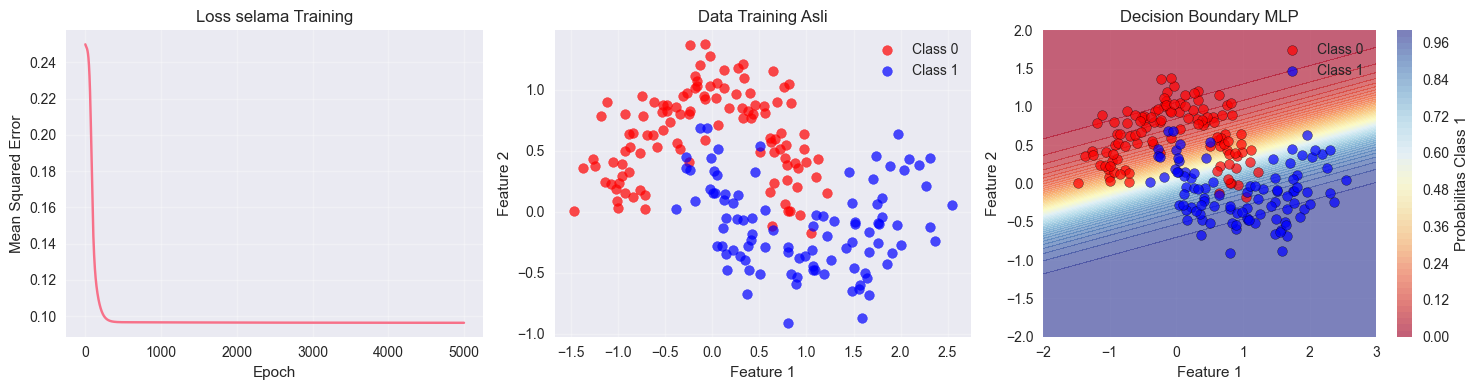


7. CONTOH PERHITUNGAN SINGLE SAMPLE...
Sample: [ 0.48362193 -0.32726869]
Target aktual: 1

=== PERHITUNGAN FEED FORWARD ===
Input: [ 0.48362193 -0.32726869]
z1 (input → hidden): [ 0.60760935 -0.62528592 -0.62665449  0.60962076]
a1 (aktivasi hidden): [0.64739527 0.34858021 0.34826951 0.64785429]
z2 (hidden → output): 2.7821
a2 (output/probabilitas): 0.9417
Prediksi: 1
Benar/Salah: Benar

SUMMARY MODEL MLP
Arsitektur: 2-4-1
Learning Rate: 0.5
Epochs: 5000
Final Loss: 0.0963
Akurasi Training: 86.67%
Akurasi Testing:  87.78%

Shape Parameter Final:
W1: (2, 4)
b1: (1, 4)
W2: (4, 1)
b2: (1, 1)

=== CONTOH PREDIKSI DATA BARU ===
Data 1: [ 0.5 -0.5] → Prediksi: 1
Data 2: [-1.   0.8] → Prediksi: 0
Data 3: [ 1.5 -0.2] → Prediksi: 1


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

print("=== MLP SEDERHANA TANPA CLASS ===")

# =============================================
# TAHAP 1: PREPARASI DATA
# =============================================
print("\n1. PREPARASI DATA...")

# Generate dataset non-linear (moons)
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)
y = y.reshape(-1, 1)  # Ubah bentuk menjadi (300, 1)

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Data training: {X_train.shape}")
print(f"Data testing: {X_test.shape}")

# =============================================
# TAHAP 2: INISIALISASI PARAMETER
# =============================================
print("\n2. INISIALISASI PARAMETER...")

def inisialisasi_parameter(input_size, hidden_size, output_size):
    """Menginisialisasi bobot dan bias secara random"""
    # Bobot dari input ke hidden layer
    W1 = np.random.randn(input_size, hidden_size) * 0.1
    # Bias untuk hidden layer
    b1 = np.zeros((1, hidden_size))
    # Bobot dari hidden ke output layer
    W2 = np.random.randn(hidden_size, output_size) * 0.1
    # Bias untuk output layer
    b2 = np.zeros((1, output_size))
    
    return W1, b1, W2, b2

# Inisialisasi parameter
input_size = 2   # 2 feature input
hidden_size = 4  # 4 neuron di hidden layer
output_size = 1  # 1 output (binary classification)

W1, b1, W2, b2 = inisialisasi_parameter(input_size, hidden_size, output_size)

print(f"Shape W1: {W1.shape}")  # (2, 4)
print(f"Shape b1: {b1.shape}")  # (1, 4)
print(f"Shape W2: {W2.shape}")  # (4, 1)
print(f"Shape b2: {b2.shape}")  # (1, 1)

# =============================================
# TAHAP 3: FUNGSI AKTIVASI
# =============================================
print("\n3. DEFINISI FUNGSI AKTIVASI...")

def sigmoid(x):
    """Fungsi aktivasi sigmoid"""
    return 1 / (1 + np.exp(-np.clip(x, -250, 250)))

def turunan_sigmoid(x):
    """Turunan fungsi sigmoid"""
    return x * (1 - x)

# =============================================
# TAHAP 4: FEED FORWARD
# =============================================
def feed_forward(X, W1, b1, W2, b2):
    """Propagasi maju dari input ke output"""
    # Input → Hidden Layer
    z1 = np.dot(X, W1) + b1      # z1 = X.W1 + b1
    a1 = sigmoid(z1)             # a1 = sigmoid(z1)
    
    # Hidden → Output Layer  
    z2 = np.dot(a1, W2) + b2     # z2 = a1.W2 + b2
    a2 = sigmoid(z2)             # a2 = sigmoid(z2) - output akhir
    
    return z1, a1, z2, a2

# =============================================
# TAHAP 5: BACKPROPAGATION
# =============================================
def backpropagation(X, y, z1, a1, z2, a2, W1, W2, learning_rate):
    """Propagasi mundur untuk update bobot"""
    m = X.shape[0]  # jumlah sample
    
    # === ERROR DI OUTPUT LAYER ===
    error_output = a2 - y                    # δ⁽²⁾ = output - target
    dW2 = (1/m) * np.dot(a1.T, error_output) # ΔW2 = δ⁽²⁾ . a1ᵀ
    db2 = (1/m) * np.sum(error_output, axis=0, keepdims=True) # Δb2 = δ⁽²⁾
    
    # === ERROR DI HIDDEN LAYER ===
    error_hidden = np.dot(error_output, W2.T) * turunan_sigmoid(a1) # δ⁽¹⁾ = (δ⁽²⁾ . W2ᵀ) * sigmoid'(a1)
    dW1 = (1/m) * np.dot(X.T, error_hidden)  # ΔW1 = δ⁽¹⁾ . Xᵀ
    db1 = (1/m) * np.sum(error_hidden, axis=0, keepdims=True) # Δb1 = δ⁽¹⁾
    
    # === UPDATE BOBOT ===
    W2_baru = W2 - learning_rate * dW2
    b2_baru = b2 - learning_rate * db2
    W1_baru = W1 - learning_rate * dW1  
    b1_baru = b1 - learning_rate * db1
    
    return W1_baru, b1_baru, W2_baru, b2_baru

# =============================================
# TAHAP 6: TRAINING MLP
# =============================================
print("\n4. PROSES TRAINING...")

def training_mlp(X, y, epochs=5000, learning_rate=0.5):
    """Fungsi utama training MLP"""
    # Inisialisasi parameter
    W1, b1, W2, b2 = inisialisasi_parameter(X.shape[1], 4, 1)
    
    loss_history = []  # Menyimpan history loss
    
    for epoch in range(epochs):
        # 1. Feed Forward
        z1, a1, z2, a2 = feed_forward(X, W1, b1, W2, b2)
        
        # 2. Hitung Loss (Mean Squared Error)
        loss = np.mean((a2 - y) ** 2)
        loss_history.append(loss)
        
        # 3. Backpropagation
        W1, b1, W2, b2 = backpropagation(X, y, z1, a1, z2, a2, W1, W2, learning_rate)
        
        # 4. Print progress setiap 1000 epoch
        if epoch % 1000 == 0:
            print(f"Epoch {epoch:4d} | Loss: {loss:.4f}")
    
    return W1, b1, W2, b2, loss_history

# Jalankan training
W1_final, b1_final, W2_final, b2_final, loss_history = training_mlp(
    X_train, y_train, epochs=5000, learning_rate=0.5
)

print(f"Loss akhir: {loss_history[-1]:.4f}")

# =============================================
# TAHAP 7: PREDIKSI DAN EVALUASI
# =============================================
print("\n5. PREDIKSI DAN EVALUASI...")

def prediksi(X, W1, b1, W2, b2):
    """Fungsi untuk melakukan prediksi"""
    _, _, _, a2 = feed_forward(X, W1, b1, W2, b2)
    return (a2 > 0.5).astype(int)  # Konversi probabilitas ke kelas (0 atau 1)

# Prediksi data training dan testing
y_pred_train = prediksi(X_train, W1_final, b1_final, W2_final, b2_final)
y_pred_test = prediksi(X_test, W1_final, b1_final, W2_final, b2_final)

# Hitung akurasi
akurasi_train = np.mean(y_pred_train == y_train)
akurasi_test = np.mean(y_pred_test == y_test)

print(f"Akurasi Training: {akurasi_train:.2%}")
print(f"Akurasi Testing:  {akurasi_test:.2%}")

# =============================================
# TAHAP 8: VISUALISASI HASIL
# =============================================
print("\n6. VISUALISASI HASIL...")

# Visualisasi 1: Loss selama training
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(loss_history)
plt.title('Loss selama Training')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True, alpha=0.3)

# Visualisasi 2: Data asli
plt.subplot(1, 3, 2)
plt.scatter(X_train[y_train.flatten() == 0, 0], X_train[y_train.flatten() == 0, 1], 
           c='red', label='Class 0', alpha=0.7)
plt.scatter(X_train[y_train.flatten() == 1, 0], X_train[y_train.flatten() == 1, 1], 
           c='blue', label='Class 1', alpha=0.7)
plt.title('Data Training Asli')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)

# Visualisasi 3: Decision Boundary
plt.subplot(1, 3, 3)
# Buat grid untuk decision boundary
xx, yy = np.meshgrid(np.linspace(-2, 3, 100), np.linspace(-2, 2, 100))
X_grid = np.c_[xx.ravel(), yy.ravel()]

# Prediksi probabilitas untuk setiap titik di grid
_, _, _, Z = feed_forward(X_grid, W1_final, b1_final, W2_final, b2_final)
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, levels=50, alpha=0.6, cmap='RdYlBu')
plt.colorbar(label='Probabilitas Class 1')

# Plot data training
plt.scatter(X_train[y_train.flatten() == 0, 0], X_train[y_train.flatten() == 0, 1], 
           c='red', label='Class 0', alpha=0.7, edgecolors='black')
plt.scatter(X_train[y_train.flatten() == 1, 0], X_train[y_train.flatten() == 1, 1], 
           c='blue', label='Class 1', alpha=0.7, edgecolors='black')

plt.title('Decision Boundary MLP')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================
# TAHAP 9: CONTOH PERHITUNGAN MANUAL
# =============================================
print("\n7. CONTOH PERHITUNGAN SINGLE SAMPLE...")

# Ambil satu sample dari data test
sample = X_test[0:1]  # Shape: (1, 2)
target_actual = y_test[0][0]

print(f"Sample: {sample[0]}")
print(f"Target aktual: {target_actual}")

# Hitung manual feed forward untuk sample ini
z1_sample = np.dot(sample, W1_final) + b1_final
a1_sample = sigmoid(z1_sample)
z2_sample = np.dot(a1_sample, W2_final) + b2_final
a2_sample = sigmoid(z2_sample)

prediksi_sample = (a2_sample > 0.5).astype(int)[0][0]

print(f"\n=== PERHITUNGAN FEED FORWARD ===")
print(f"Input: {sample[0]}")
print(f"z1 (input → hidden): {z1_sample[0]}")
print(f"a1 (aktivasi hidden): {a1_sample[0]}")
print(f"z2 (hidden → output): {z2_sample[0][0]:.4f}")
print(f"a2 (output/probabilitas): {a2_sample[0][0]:.4f}")
print(f"Prediksi: {prediksi_sample}")
print(f"Benar/Salah: {'Benar' if prediksi_sample == target_actual else 'Salah'}")

# =============================================
# TAHAP 10: SUMMARY MODEL
# =============================================
print("\n" + "="*50)
print("SUMMARY MODEL MLP")
print("="*50)
print(f"Arsitektur: {input_size}-{hidden_size}-{output_size}")
print(f"Learning Rate: 0.5")
print(f"Epochs: 5000")
print(f"Final Loss: {loss_history[-1]:.4f}")
print(f"Akurasi Training: {akurasi_train:.2%}")
print(f"Akurasi Testing:  {akurasi_test:.2%}")
print(f"\nShape Parameter Final:")
print(f"W1: {W1_final.shape}")
print(f"b1: {b1_final.shape}") 
print(f"W2: {W2_final.shape}")
print(f"b2: {b2_final.shape}")

# Contoh penggunaan untuk prediksi baru
print(f"\n=== CONTOH PREDIKSI DATA BARU ===")
data_baru = np.array([[0.5, -0.5], 
                      [-1.0, 0.8], 
                      [1.5, -0.2]])
prediksi_baru = prediksi(data_baru, W1_final, b1_final, W2_final, b2_final)

for i, (data, pred) in enumerate(zip(data_baru, prediksi_baru)):
    print(f"Data {i+1}: {data} → Prediksi: {pred[0]}")